# Image Processing

José Luis Lobera del Castillo <br>
José Miguel de la Mora Álvarez <br>
Rafael Andrade Ruíz Capetillo

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
from skimage import exposure

### Part 1

1.1 Download the Girl Face image and plot a histogram of the grey levels it contains. (Try plotting a histogram of another grey scale image and comparing the difference) (5 points)

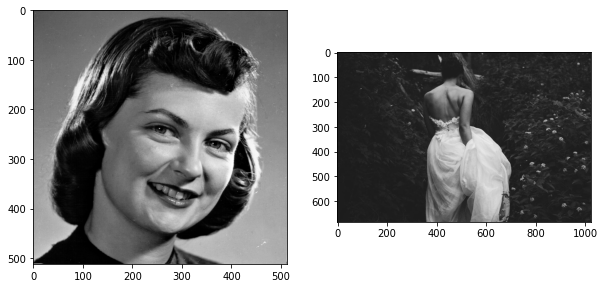

In [72]:
imageGirl = cv2.imread('Girl Face.png', 0)
imageBride = cv2.imread('boda.jpeg', 0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imageGirl, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imageBride, cmap='gray')


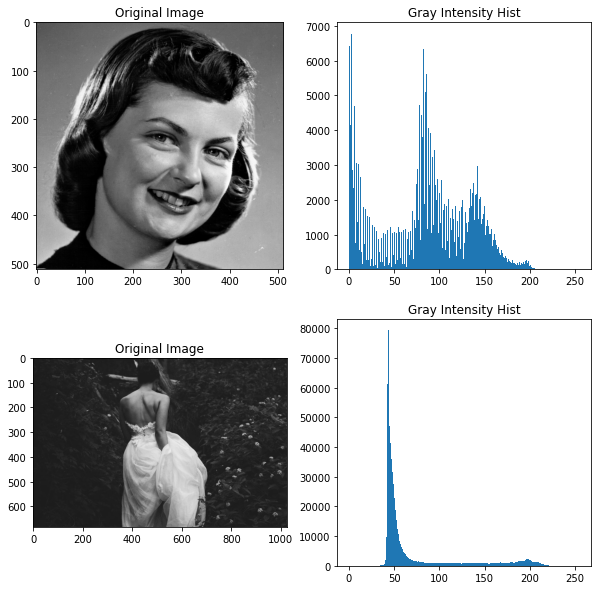

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(imageGirl,cmap='gray')

plt.subplot(2,2,2)
plt.title('Gray Intensity Hist')
plt.hist(imageGirl.ravel(),256,[0,255])

plt.subplot(2,2,3)
plt.title('Original Image')
plt.imshow(imageBride,cmap='gray')

plt.subplot(2,2,4)
plt.title('Gray Intensity Hist')
plt.hist(imageBride.ravel(),256,[0,255])

plt.show()

1.2 Write a short program to threshold the image and try to identify a good threshold by trial and error. Create a ground truth segmentation. (15 points)

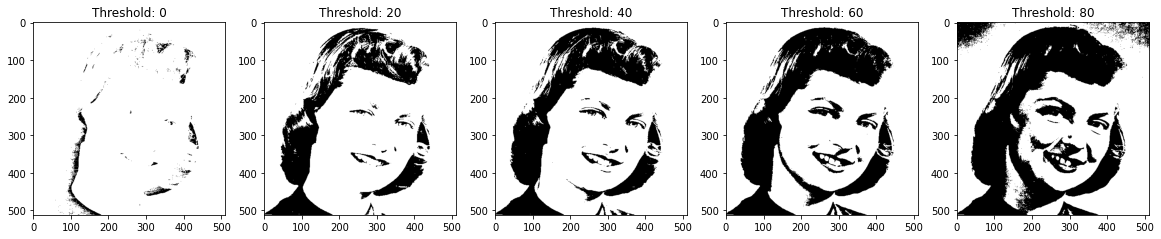

In [70]:
thresholds = np.array(list(range(0, 100, 20)))

plt.figure(figsize=(20,5))

for i, threshold in enumerate(thresholds):
    binary_mask = imageGirl > threshold

    plt.subplot(1,5,i+1)
    plt.imshow(binary_mask, cmap="gray")
    plt.title('Threshold: ' + str(threshold))

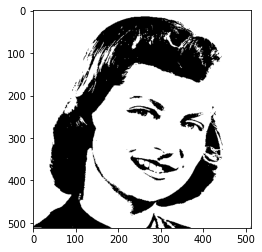

In [71]:
thresholdGirl = imageGirl > 50

plt.figure()
plt.imshow(thresholdGirl, cmap="gray")
plt.show()

1.3 Use your ground truth segmentation to plot an ROC curve for your thresholding algorithm. What threshold does the ROC curve suggest? You may have to implement an algorithm to find the point closest to a desired Operating Point. How does it compare to your trial and error estimate? (30 points)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'bitwise_or'
> Overload resolution failed:
>  - src1 data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src1'


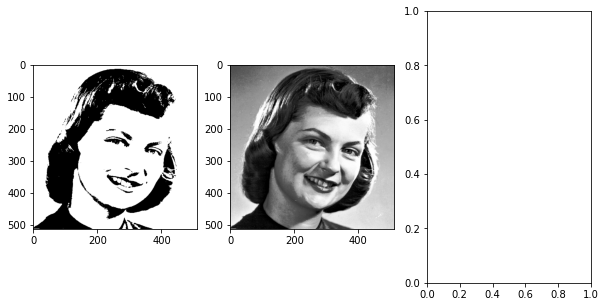

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

# INCOMPLETO

ground_truth = exposure.equalize_hist(imageGirl, nbins=256)
ground_truth = (ground_truth * 255).astype(int)
#y = cv2.threshold(imageGirl, 50, 255, cv2.THRESH_BINARY_INV)[1]

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(thresholdGirl, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(ground_truth, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(cv2.bitwise_or(thresholdGirl, ground_truth), cmap="gray")
plt.show()


#fpr, tpr, thresholds = roc_curve(np.binary_repr(ground_truth), np.binary_repr(thresholdGirl))